# Binomial Lattice Model


# Assumptions
<ul>
    <li>Binomial Lattice model works with the assumption of Efficient Market Hypothesis which states current price of stock     reflects all available information and will change only with the arrival of a new info</li>
    <ul>
        <li>Do not worry about past history of stocks</li>
        <li>Start with current stock price and worry about future</li>
    </ul>
</ul>



Let the current price of stock be S<sub>0</sub> at time t = 0<br>
Since stock has no expiry so duration of a stock is the semi - infinite interval -- [0, $\infty$)<br>
Now, partition the interval into equal parts (t<sub>0</sub>,t<sub>1</sub>,t<sub>2</sub>,t<sub>3</sub>,.....)<br>
We will analyze the interval [t<sub>k</sub>,t<sub>k+1</sub>] to build a one step binomial model for k = 0,1,2, ....<br>
Let the price of stock be S<sub>k</sub> at time t = t<sub>k</sub><br>
Let r<sub>k</sub> be the interest rate during [t<sub>k</sub>,t<sub>k+1</sub>]<br>
Let d<sub>k</sub>(down) and u<sub>k</sub>(up) be such that 0 < d<sub>k</sub> < e<sup>r<sub>k</sub>T</sup> < u<sub>k</sub> [NO ARBITRAGE CONDITION] (Assuming continuous compounding)<br>

Model evaluates the probability for the current price S<sub>k</sub> to jump to S<sub>k</sub>u<sub>k</sub> or S<sub>k</sub>d<sub>k</sub><br>
Sample space for the 1 step BLM is {u<sub>k</sub>,d<sub>k</sub>}, therefore $\sigma$-field is the power set<br>
Discrete Probability => P<sub>k</sub> = 
<ul>
    <li>p<sub>k</sub>, if s = u<sub>k</sub></li>
    <li>1 - p<sub>k</sub>, if s = d<sub>k</sub></li>
</ul>
where p<sub>k</sub> $\epsilon$ (0,1)<br>

Define the random variable X<sub>k+1</sub>(s) = S<sub>k</sub>s

Stock price at t = t<sub>k+1</sub> is taken to be S<sub>k+1</sub> = X<sub>k+1</sub>, given the stock price at t = t<sub>k</sub><br>
Therefore for  1 step BLM,<br>
At t = t<sub>k+1</sub>,<br>
&nbsp;&nbsp;stock price is S<sub>k</sub>u<sub>k</sub> with probability p<sub>k</sub>, or<br>
&nbsp;&nbsp;stock price is S<sub>k</sub>d<sub>k</sub> with probability 1 - p<sub>k</sub>

<b>Note</b> --> We can input S<sub>k</sub> from the spot market<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; and r<sub>k</sub> can be input from bond market

### Fair Game Criteria
Expected Present Value should be equal to S<sub>0</sub><br>
E[S] = PV(S<sub>0</sub>u) * p + PV(S<sub>0</sub>d) * (1-p)<br>
E[S] = S<sub>0</sub> = PV(S<sub>0</sub>u) * p + PV(S<sub>0</sub>d) * (1-p)<br>
#### risk neutral probability
p = [S<sub>0</sub> - PV(S<sub>0</sub>d)]/[PV(S<sub>0</sub>u) - PV(S<sub>0</sub>d)]<br>
p = [1-PV(d)]/[PV(u) - PV(d)]<br>
<b>Note</b> that p $\epsilon$ (0,1) due to no-arbitrage condition

In [234]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [175]:
def PV(x,r,t, nature = "continuous"):
    '''
    Function to calculate the present value
    '''
    if nature == "continuous":
        return x * math.exp(-r * t)
def BLM_prob(u,d,r,t):
    '''
    Function to calculate probability of upside movement using Binomial Lattice Model
    '''
    pv_up = PV(u,r,t)
    pv_down = PV(d,r,t)
    return (1 - pv_down) / (pv_up - pv_down)

In [176]:
#Interest rate per annum
r = 0.0344
#Current Stock Price
S0 = 15900
#Let's say from our intuition we think that stock either touches 1260 or 675
u = 16500/S0
d = 15300/S0
#Time to maturity
t_arr = [1, 1/2,1/12,1/252, 1/(252*6)]
#Now, we need to find the risk-neutral probability p, calculated on fair game criteria
#Using continuous compounding interest scheme
for t in t_arr:
    p = BLM_prob(u,d,r,t)
    print("Probability of stock going upto {x} in {year} days is {prob}".format(x = S0*u, year = round(t*365,2),prob = round(p,4)))

Probability of stock going upto 16500.0 in 365 days is 0.9637
Probability of stock going upto 16500.0 in 182.5 days is 0.7299
Probability of stock going upto 16500.0 in 30.42 days is 0.538
Probability of stock going upto 16500.0 in 1.45 days is 0.5018
Probability of stock going upto 16500.0 in 0.24 days is 0.5003


# Multistep- Binomial Model

Can be visualized as tossing single coins several times, where each tossing is assumed to be independent<br>
start with t = 0 and apply single step BLM sequentially to reach t<sub>k+1</sub>

Assume- We bought a stock at t = 0 and decide to hold it till t = T, therefore period is [0,T]<br>
Now, divide this period into n intervals for a n step BLM i.e {t<sub>0</sub> = 0, t<sub>1</sub> = T/n, t<sub>2</sub> = 2T/n,..., t<sub>n</sub> = T}<br>
Now, you need to define upward and downward movement of stock at each time step<br>
at t = 0, we have S<sub>0</sub>
at t = t<sub>1</sub>, we have {S<sub>0</sub>u<sub>0</sub>, S<sub>0</sub>d<sub>0</sub>} with probability {p<sub>0</sub>,1-p<sub>0</sub>}<br>
at t = t<sub>2</sub>, we have {S<sub>0</sub>u<sub>0</sub>u<sub>1</sub>,S<sub>0</sub>u<sub>0</sub>d<sub>1</sub>, S<sub>0</sub>d<sub>0</sub>u<sub>1</sub>,S<sub>0</sub>d<sub>0</sub>d<sub>1</sub>} with probability {{p<sub>1</sub>,1-p<sub>1</sub>},{p<sub>1</sub>,1-p<sub>1</sub>}}<br>
and so on

P({s}) = P1({s<sub>0</sub>})P2({s<sub>1</sub>})..... [because events are independent]<br>
where s<sub>0</sub> = {u<sub>0</sub>,d<sub>0</sub>}, s<sub>1</sub> = {u<sub>1</sub>,d<sub>1</sub>}<br>

In [177]:
from math import comb

In [178]:
def create_paths(S0,u,d,r,t,layers):
    
    p = BLM_prob(u,d,r,t)
    print(p)
    path = []
    for i in range(layers):
        stock_price = S0 * u**(layers - i - 1) * d**i
        prob_stock_price = comb(layers - 1,i)* p**(layers - i - 1) * (1-p)**i
        path.append([stock_price,prob_stock_price])
    return path

In [179]:
# Now assuming that uk = u0 and dk = d0, we will try bulding our model
#Interest rate per annum
r = 0.0344
#Current Stock Price
S0 = 15900
#Let's say from our intuition we think that stock either touches 1260 or 675
sigma = 0.2
num_layers = 1000
strike_price = 16000
t = 1/(252*375*3)
u = math.exp(sigma*math.sqrt(t))
d = 1/u
final_path = create_paths(S0,u,d,r,t,layers = num_layers)

0.5000676123474248


In [180]:
exp_val = 0
exp_premium = 0
for i in final_path:
    exp_val = exp_val + i[0] * i[1]
    exp_premium = exp_premium + max(i[0]-strike_price,0)*i[1]
print(PV(exp_val,r,t*num_layers))
print(PV(exp_premium,r,t*num_layers))

15899.998070687561
36.41826982957358


In [181]:
stock_prices = [item[0] for item in final_path]
stock_price_p = [item[1] for item in final_path]

(12000.0, 20000.0)

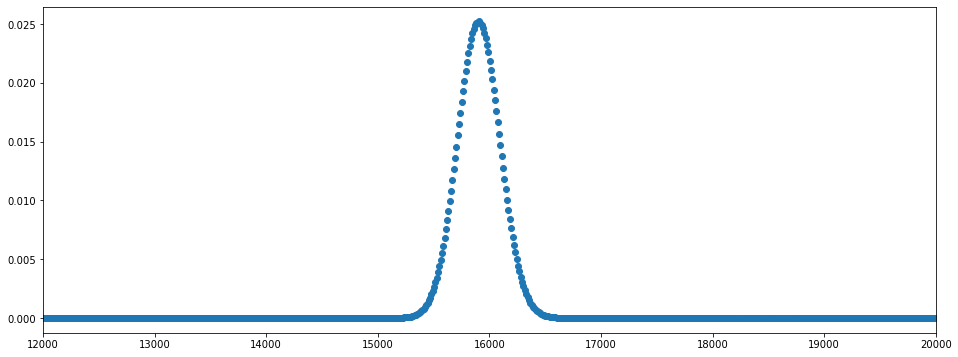

In [182]:
plt.figure(figsize = (16,6))
plt.scatter(stock_prices,stock_price_p)
plt.xlim([12000,20000])

# Lognormal Model

We need to consider continuous time model rather than discrete time model<br>
Also, we need to assume continuous values for S i.e anything in the interval (S - $\epsilon$, S + $\epsilon$)<br>

Now, firstly we will update our model to continuous random variable

We assume that during an interval S(t<sub>k+1</sub>) = S(t<sub>k</sub>)e<sup>rt<sub>k</sub></sup><br>
and these e<sup>rt<sub>k</sub></sup> are iid and have expectation $\mu$<sup>$\sim$</sup> and variance $\sigma$<sup>$\sim$2</sup><br>
E[ln(S(1)/S(0)] = $\mu$<br>
Var[ln(S(1)/S(0)] =$\sigma$<sup>2</sup><br>
$\mu$ = n$\mu$<sup>$\sim$</sup><br>
$\sigma$<sup>2</sup> = n$\sigma$<sup>$\sim$2</sup>

P[(ln(S(1)/S(0)) - $\mu$)/$\sigma$<=r] = P[(ln(S(1)/S(0)) - n$\mu$<sup>$\sim$</sup>)/$\sigma$<sup>$\sim$</sup>$\sqrt{n}$<=r]<br>
Therfore central limit theorem can be applied
Lim<sub>n-->$\infty$</sub>[P[(ln(S(1)/S(0)) - n$\mu$<sup>$\sim$</sup>)/$\sigma$<sup>$\sim$</sup>$\sqrt{n}$<=r]] = $\phi$(r)<br>
[ln(S(1)/S(0)) - $\mu$]/$\sigma$ $\sim$ N(0,1)<br>
ln(S(1)/S(0))$\sim$ N($\mu$,$\sigma$<sup>2</sup>)<br>
S(1)/S(0) is lognormally distributed<br>
$\mu$<sub>T</sub> = $\mu$T<br>
$\sigma$<sub>T</sub><sup>2</sup> = $\sigma$<sup>2</sup>T<br>
ln(S(T)/S(0))$\sim$N($\mu$T,$\sigma$<sup>2</sup>T)
S(T)/S(0) is lognormally distributed

### Therefore stock price follows lognormal distribution

Now, to obtain $\mu$ and $\sigma$, we will be using past 1 year data to get these parameters

In [293]:
df = pd.read_csv('nifty_past1yr.csv',parse_dates = True)
df = df[["Date","Close"]]
df.dropna(inplace = True)

df1 = pd.read_csv('nifty_past_past_1yr.csv',parse_dates = True)
df1 = df1[["Date","Close"]]
df1.dropna(inplace = True)

df2 = pd.read_csv('nifty_past_past_past_1yr.csv',parse_dates = True)
df2 = df2[["Date","Close"]]
df2.dropna(inplace = True)

df = pd.concat([df2,df1,df],axis = 0)
df["Close_1_before"] = df["Close"].shift(1)
df["ln(S/s0)"] = np.log(df["Close"] / df["Close_1_before"])
df.dropna(inplace = True)

In [294]:
mu_daily = df["ln(S/s0)"].mean()
std_daily = df["ln(S/s0)"].std(ddof = 1)
mu_yearly = mu_daily * 252
std_yearly = std_daily * np.sqrt(252)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,
         1.,  2.,  1.,  1.,  2.,  1.,  5.,  4.,  8.,  8., 14., 15., 25.,
        43., 46., 61., 73., 82., 84., 79., 61., 36., 22., 22.,  8.,  6.,
         5.,  3.,  1.,  3.,  0.,  1.,  3.,  1.,  0.,  1.,  0.,  0.,  1.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.13903754, -0.13655932, -0.13408109, -0.13160286, -0.12912463,
        -0.12664641, -0.12416818, -0.12168995, -0.11921172, -0.1167335 ,
        -0.11425527, -0.11177704, -0.10929882, -0.10682059, -0.10434236,
        -0.10186413, -0.09938591, -0.09690768, -0.09442945, -0.09195123,
        -0.089473  , -0.08699477, -0.08451654, -0.08203832, -0.07956009,
        -0.07708186, -0.07460364, -0.07212541, -0.06964718, -0.06716895,
        -0.06469073, -0.0622125 , -0.05973427, -0.0572

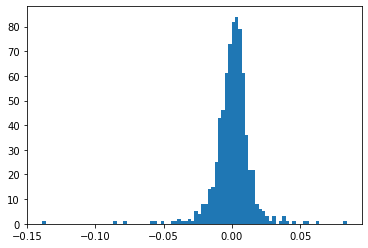

In [299]:
plt.hist(df["ln(S/s0)"].values,bins = 90)